# Upload data & load library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
path = "D:\.vscode\kodingan\DataSource\Chapter06DataSet.csv"
load_data = pd.read_csv(path)


In [3]:
data = pd.DataFrame(load_data)
data.head()

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


# Bussines Understanding
Sabarudin Hidayah is a program director for a major health insurance provider. Recently she has been reading in medical journals and other articles, and found a strong emphasis on the influence of weight, gender and cholesterol on the development of coronary heart disease. The research she’s read confirms time after time that there is a connection between these three variables, and while there is little that can be done about one’s gender, there are certainly life choices that can be made to alter one’s cholesterol and weight. She begins brainstorming ideas for her company to offer weight and cholesterol management programs to individuals who receive health insurance through her employer. As she considers where her efforts might be most effective, she finds herself wondering if there are natural groups of individuals who are most at risk for high weight and high cholesterol, and if there are such groups, where the natural dividing lines between the groups occur.

## Problem
Problem : Clustering, unsupervised learning

## Goal 
1. predictive tingkat reseiko jantung koroner dengan metode clustering

## Algoritma 
Algoritma : k-means clustering



# Data Understanding

## tingkatan kolesterol 
1. normal : dibawah 200 mg/dl
2. tinggi : diatas 200 mg/dl

In [4]:
data

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1
...,...,...,...
542,172,207,1
543,129,157,1
544,107,115,1
545,117,147,1


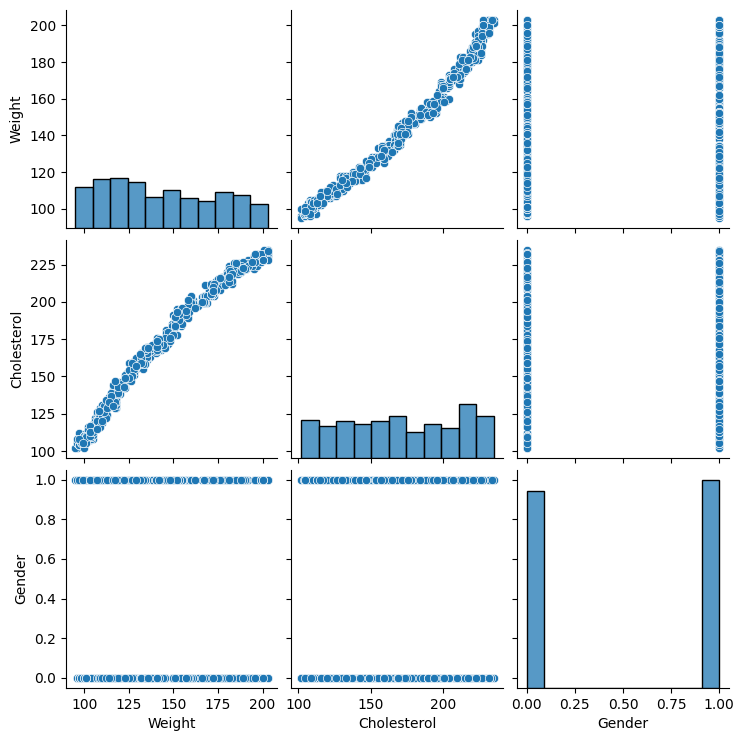

In [5]:
# scatter plot using seaborn
sns.pairplot(data)

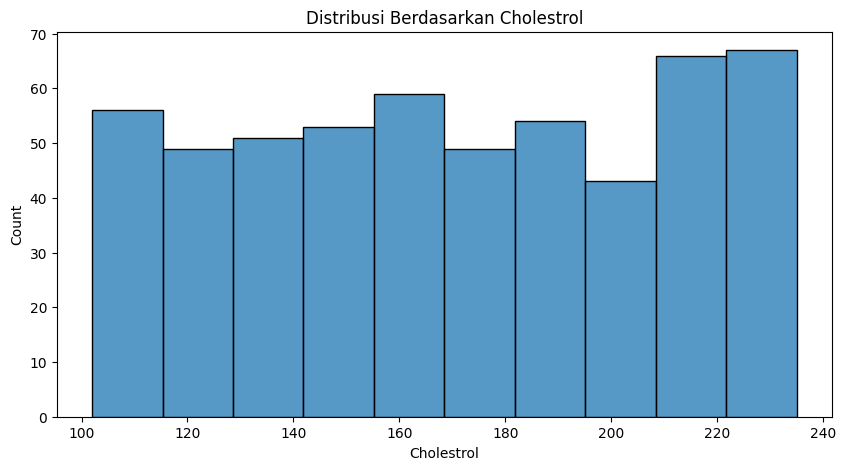

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x="Cholesterol", kde=False, bins=10)
plt.title("Distribusi Berdasarkan Cholestrol")
plt.xlabel("Cholestrol")
plt.show()

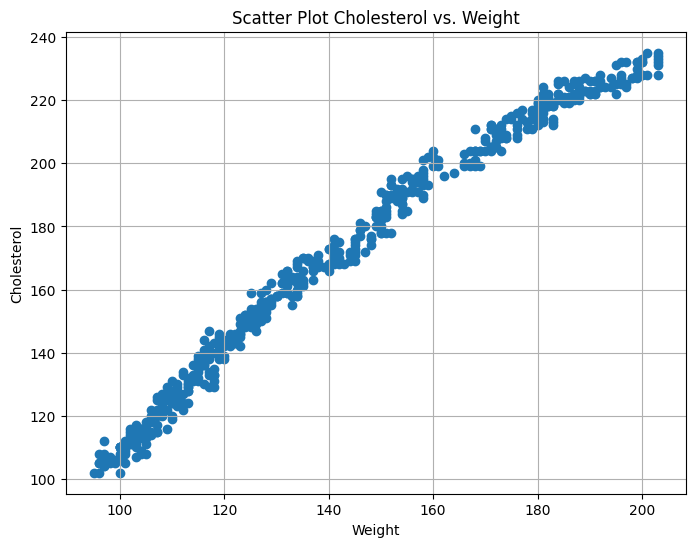

In [7]:
# Membuat scatter plot Cholesterol vs. Weight
plt.figure(figsize=(8, 6))
plt.scatter(data["Weight"], data["Cholesterol"])
plt.title("Scatter Plot Cholesterol vs. Weight")
plt.xlabel("Weight")
plt.ylabel("Cholesterol")
plt.grid()

# Menampilkan plot
plt.show()

# Cholesterol vs Weight
terdapat pola yang berbanding lurus antara kolesterol dan weight
maka dikatakan semakin tinggi berat badan seseorang makin tinggi juga tingkat kolesterolnya

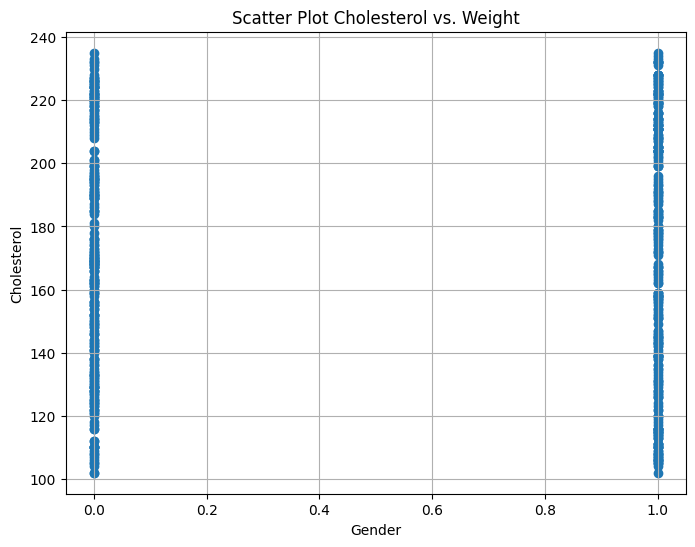

In [8]:
# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data["Gender"], data["Cholesterol"])
plt.title("Scatter Plot Cholesterol vs. Weight")
plt.xlabel("Gender")
plt.ylabel("Cholesterol")
plt.grid(True)

# Menampilkan plot
plt.show()

## Colesterol Berdasarkan Jumlah Nasabah
1. ada lebih dari 50 nasabah asuransi yang terindentifikasi high colesterol

## evaluasi clustering
di butuhkan untuk menentukan berapa nilai k yang akan di input kedalam n_cluster


## gender vs colesterol 

antara laki-laki dan perempuna memmiliki kesamaan, berpeluang kolesterol tinggi

## pengaruh weight vs colesterol
jika weight bertambah kolesterol bertambah

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Weight       547 non-null    int64
 1   Cholesterol  547 non-null    int64
 2   Gender       547 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB


In [10]:
data.isnull().sum()

Weight         0
Cholesterol    0
Gender         0
dtype: int64

# Using KMeans clustering


In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [12]:
x = data[['Weight',	'Cholesterol',	'Gender']]

c:\Users\ANGELO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ANGELO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ANGELO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ANGELO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\clus

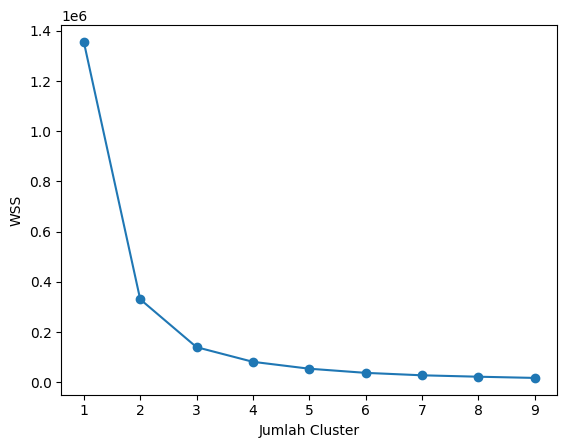

In [13]:
cluster_range = range(1,10)
cluster_wss = []

for num_cluster in cluster_range:
  clusters = KMeans(num_cluster)
  clusters.fit(x)
  cluster_wss.append(clusters.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker = 'o')
plt.show()

## elbow method 
salah satu teknik yang di gunakan dalam clustering untuk menentukan n cluster, dimana n adalah nilai terbaik

WSS = within cluster sum of square


nilai n cluster terbaik versi elbow method: 3 dan 4

In [14]:
cls = KMeans(n_clusters=4, random_state=0)

# membentuk model
model_cls = cls.fit(x)



c:\Users\ANGELO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
data['cluster'] = model_cls.labels_
data

,Weight,Cholesterol,Gender,cluster
0,102,111,1,2
1,115,135,1,2
2,115,136,1,2
3,140,167,0,0
4,130,158,1,0
...,...,...,...,...
542,172,207,1,1
543,129,157,1,0
544,107,115,1,2
545,117,147,1,0


In [16]:
data['cluster'].value_counts()

cluster
1    154
2    140
0    135
3    118
Name: count, dtype: int64

In [17]:

# fig = px.scatter(data, x='Weight', y='Cholesterol', color='cluster', size='Weight', hover_data=['Cholesterol'])
# fig.show()

data['Cluster_Label'] = data['cluster'].map({0: "medium risk", 1: "high risk", 2: "low risk", 3: "potentially high risk"})

fig = px.scatter(data, x="Weight", y="Cholesterol", color="cluster", size="Weight", hover_data=["Cluster_Label"])
fig.update_traces(text=data['Cluster_Label'], selector=dict(mode='markers+text'))

fig.show()


## hasil cluster 
didapatkan 4 kelompok orang yang beresiko jantung koroner, berikut ini kelompok cluster berdasar kan resiko 

1. Cluster 1 : cluster High Risk,memiliki resiko tinggi jantung koroner.
2. Cluster 3 : Cluster Berpotensi tinggi, memiliki potensi yang tinggi untuk memiliki jantung koroner. hal ini di tunjukan cholesterol dan weight berada pada ambang batas normal.
3. Cluster 0 : Cluster medium risk/moderate, memiliki resiko rendah jantung koroner.
4. Cluster 2 : Cluster Low Risk, memiliki resiko rendah jantung koroner



Berapakah Jumlah Nasabah yang akan di prospek untuk mengikuti program baru "Treatment mengurangi resiko jantung koroner"? 